In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

(2000, 1) (2000, 1)


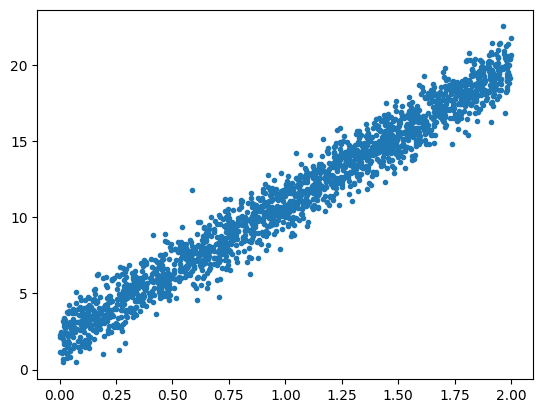

In [41]:
samples = 2000

X = 2 * np.random.rand(samples, 1)
epsilon =  np.random.normal(0, 1, size=(samples,1))

print(epsilon.shape, X.shape)

y = 2 + 9 * X + epsilon

plt.plot(X, y, '.')

In [42]:
X = np.c_[np.ones(samples), X]
X[:5], X.shape

(array([[1.        , 1.16229583],
        [1.        , 1.62953736],
        [1.        , 0.8462364 ],
        [1.        , 1.80662934],
        [1.        , 0.96663644]]),
 (2000, 2))

## Train|Test split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1340, 2), (660, 2), (1340, 1), (660, 1))

## Batch gradient descent

In [44]:
np.random.seed(42)
def gradient_descent(X, y, learning_rate= .1, epochs = 100):
    m = len(X)
    theta = np.random.rand(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
    return theta

In [45]:
theta = gradient_descent(X_train, y_train, epochs=1000)

theta

array([[2.04107238],
       [8.95515648]])

In [46]:
steps = range(1, 200, 1)
thetas = np.array([gradient_descent(X_train, y_train,
                  epochs=epoch).reshape(-1) for epoch in steps])


thetas.shape

(199, 2)

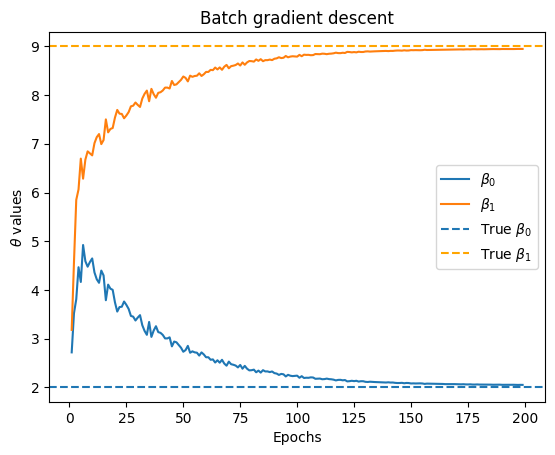

In [47]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label=[r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y=2, linestyle="--", label=r"True $\beta_0$")
ax.axhline(y=9, color="orange", linestyle="--", label=r"True $\beta_1$")
ax.set(xlabel="Epochs", ylabel=r"$\theta$ values",
       title="Batch gradient descent")
ax.legend()


## Stochastic gradient descent (SGD)

- Geron (2019)

In [48]:
epochs =  10
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_rate_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i) 
        theta -= eta * gradient 
theta

array([[2.02002692],
       [8.9402809 ]])

### Mini batch får vi implmeneta själv

In [49]:
y_pred= X_test@theta
MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test - y_pred) ** 2)

RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.8072380901493783, 1.035683308962329, 1.01768527009205)